In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
!pip install mglearn
import mglearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.4/581.4 kB 7.8 MB/s eta 0:00:00


Text(0, 0.5, 'Qtd de produtos')

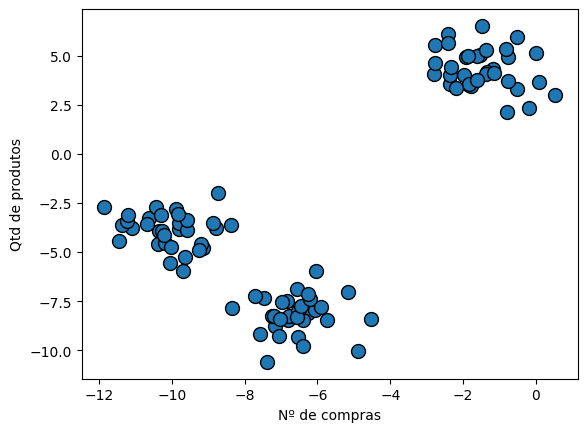

In [6]:
# Gera dados aleatórios com 2 características (colunas) e rótulos
x,y = make_blobs(random_state=1)
# X terá sempre 2 colunas por padrão
# y contém os rótulos das classes (grupos)
# como nao estamos utilizando dados rotulados, nao iremos utilizar o y


plt.scatter(x[:,0], x[:,1], s=100, linewidths=1, edgecolors='black')

plt.xlabel("Nº de compras")
plt.ylabel("Qtd de produtos")

In [9]:
#define model
#k=3
model = KMeans(n_clusters=3, random_state=0)

In [11]:
#training model
model.fit(x)

KMeans(n_clusters=3, random_state=0)

Text(0, 0.5, 'Qtd de produtos')

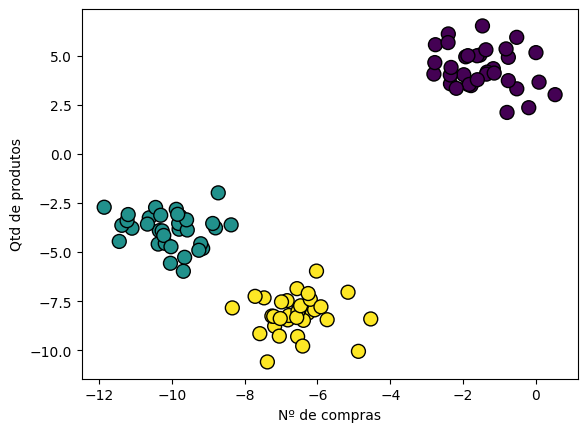

In [12]:
#predict
labels= model.predict(x)

plt.scatter(x[:,0], x[:,1], s=100, linewidths=1, c=labels, edgecolors='black')

plt.xlabel("Nº de compras")
plt.ylabel("Qtd de produtos")

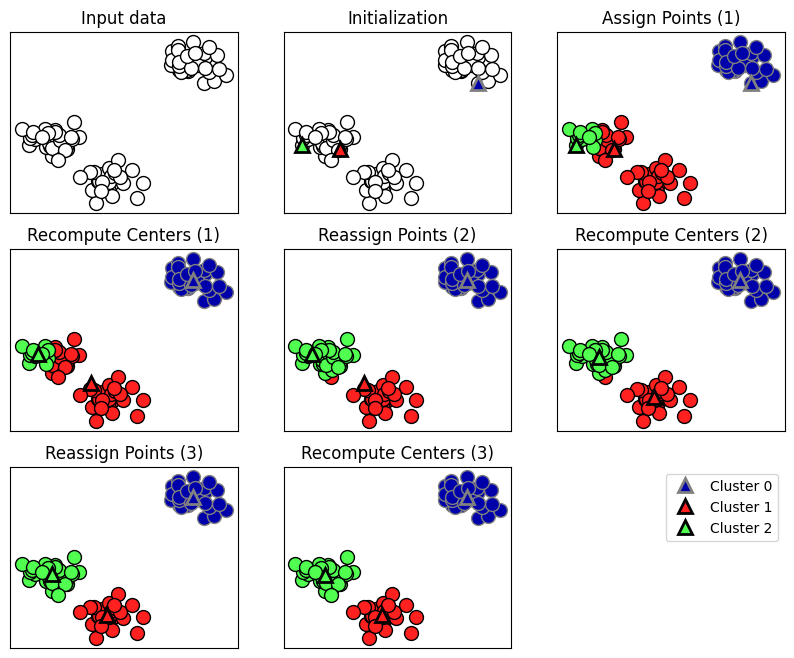

In [13]:
mglearn.plots.plot_kmeans_algorithm()

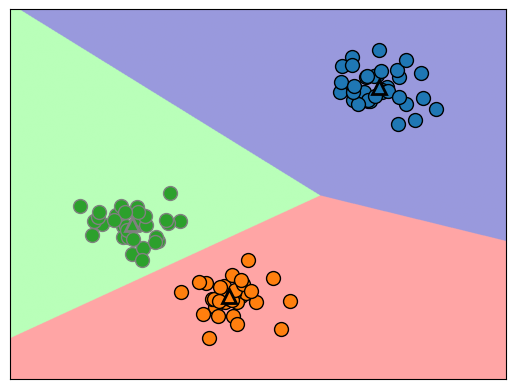

In [14]:
mglearn.plots.plot_kmeans_boundaries()

In [ ]:
#adicionando novos pontos

In [15]:
compras = np.random.uniform(-12, 0, 5)
produtos = np.random.uniform(-10, 5, 5)

X_test = np.column_stack((compras, produtos))

X_test

array([[ -6.59150143,  -1.43239151],
       [ -6.06056304,  -6.6615855 ],
       [ -4.23363614,   1.73601852],
       [ -7.62976446,  -3.17458287],
       [-10.98623545,  -6.95126676]])

In [16]:
#predict o new data
labels_predict = model.predict(X_test)
labels_predict

array([1, 2, 0, 1, 1], dtype=int32)

Text(0, 0.5, 'Qtd de produtos')

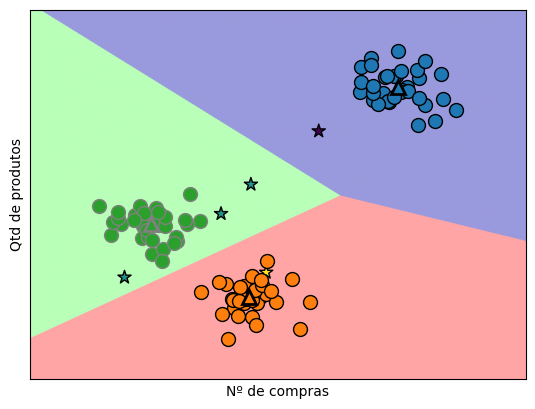

In [17]:
mglearn.plots.plot_kmeans_boundaries()
plt.scatter(X_test[:,0], X_test[:,1], s=100, linewidths=1, c=labels_predict, edgecolors='black', marker='*')

plt.xlabel("Nº de compras")
plt.ylabel("Qtd de produtos")

# **Elbow Exercicio**

In [18]:
from sklearn.datasets import load_wine
import seaborn as sns

wine = load_wine()
Wine_X = wine.data
y_true = wine.target

wine_df = pd.DataFrame(Wine_X, columns=wine.feature_names)
print(wine_df)



     alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonflavanoid_phenols  proanthocyan

In [19]:
wine_df['cultivar'] = pd.Series(y_true).map({0: wine.target_names[0], 1: wine.target_names[1], 2: wine.target_names[2]})

# Gerar o pairplot
# O hue='cultivar' colore os pontos de acordo com o cultivar real do vinho
sns.pairplot(wine_df, hue='cultivar', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot do Dataset Wine', y=1.02) # Ajusta o título para não sobrepor
plt.show()

Output hidden; open in https://colab.research.google.com to view.

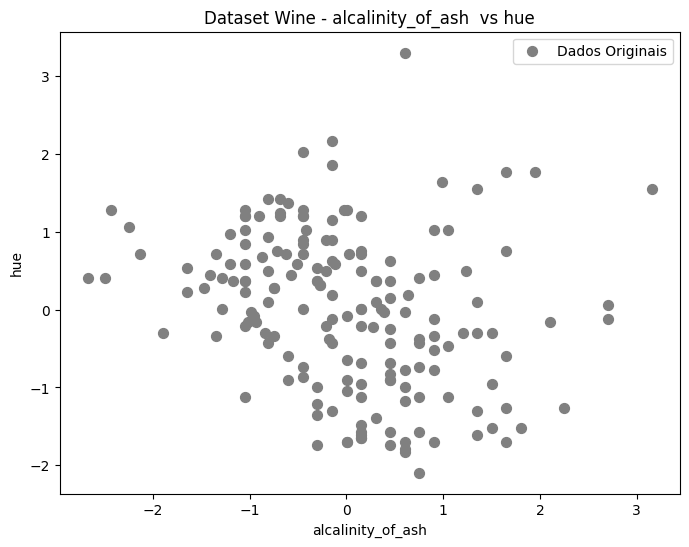

In [20]:
# --- PASSO NOVO: PADRONIZAR OS DADOS ---
from sklearn.preprocessing import StandardScaler
# 2. Criar uma instância do scaler
scaler = StandardScaler()
Wine_X = wine.data

# 3. Ajustar e transformar o dataset COMPLETO
Wine_X_scaled = scaler.fit_transform(Wine_X)
# Agora temos uma versão dos dados onde todas as colunas estão na mesma escala.
# --


#grafico de dispersao

X_selected = Wine_X_scaled[:, [3, 10]]  # Extract 'sepal length' (index 0) and 'petal length' (index 2)

# Visualize the data
plt.figure(figsize=(8, 6))
plt.scatter(X_selected[:, 0], X_selected[:, 1], c='gray', marker='o', s=50, label='Dados Originais')
plt.xlabel(wine.feature_names[3])
plt.ylabel(wine.feature_names[10])
plt.title('Dataset Wine - alcalinity_of_ash  vs hue')
plt.legend()
plt.show()

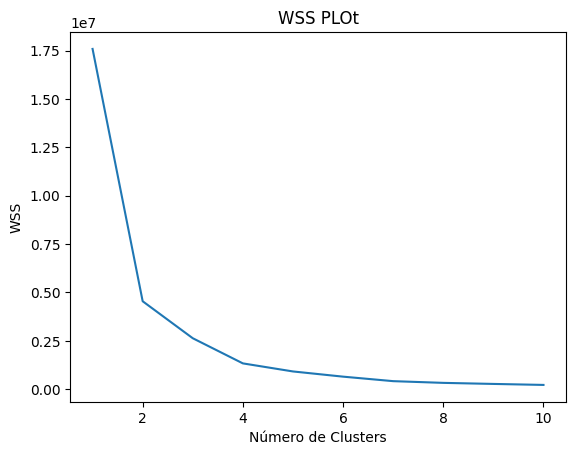

In [21]:

was = {}

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1).fit(Wine_X) #porque nao utilizar o inertia_ do proprio kmeans, recomendaria nao utilizalo ou apenas nao tinha sido implementado para o exercicio?
    was[k] = kmeans.inertia_

#WSS PLOT

plt.figure()
plt.plot(list(was.keys()), list(was.values()))
plt.title("WSS PLOt")
plt.xlabel("Número de Clusters")
plt.ylabel("WSS")
plt.show()

#2??

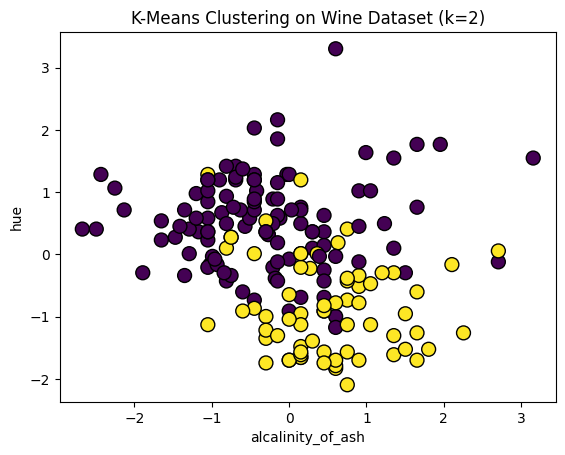

In [27]:
model = KMeans(n_clusters=2, random_state=0)
model.fit(Wine_X_scaled)

labels = model.predict(Wine_X_scaled)

#tem como mostrar o grafico de boundaries?

X_plot = Wine_X_scaled[:, [3, 10]]
plt.scatter(X_plot[:, 0], X_plot[:, 1], s=100, linewidths=1, c=labels, edgecolors='black')

plt.xlabel(wine.feature_names[3])
plt.ylabel(wine.feature_names[10])
plt.title('K-Means Clustering on Wine Dataset (k=2)')
plt.show()

In [ ]:
#escolhi por ser o mais denso, mas porque foi um resultado ruim?